# Chapter 08. 텍스트 분석

* 텍스트 분류 : 문서가 어떤 카테고리에 속하는지 분류. 지도학습 이용. 예시) 기사를 연애/정치/사회/문화 카테고리로 분류, 스팸 메일 검출 프로그램
* 감성 분석 : 텍스트에 나타나는 감정, 기분 등 주관적인 요소를 분석하는 기법. 지도학습, 비지도학습 둘다 가능. 예시) sns 감정 분석, 제품 리뷰 분석, 여론조사 분석
* 텍스트 요약 : 주요 주제나 사상을 추출하는 기법. 토픽 모델링이 대표적.
* 텍스트 군집화와 유사도 측정 : 비슷한 유형의 문서끼리 군집화.

## 01. 텍스트 분석 이해

머신러닝 알고리즘은 숫자형 데이터만 입력받을 수 있어, 비정형 텍스트 데이터를 어떻게 피처 형태로 추출하고, 의미있는 값을 부여하는가는 매우 중요한 요소이다.

#### 텍스트 분석 수행 프로세스
1. 텍스트 전처리 : 대/소문자 변경, 특수문자 삭제 등 클렌징 작업, 토큰화, Stop word 제거 작업, 어근 추출(Stemming/Lemmatization) 등 텍스트 정규화 작업 
2. 피처 벡터화/추출 : 전처리된 텍스트에서 피처를 추출하고 벡터 값 할당. 대표적으로 BOW와 워드투벡이 있으며, BOW는 카운트 기반과 Tf-idf 기반 벡터화가 있다.
3. ML 모델 수립 및 학습/예측/평가 : 벡터화된 데이터 셋에 모델을 적용해 학습/예측 및 평가 수행

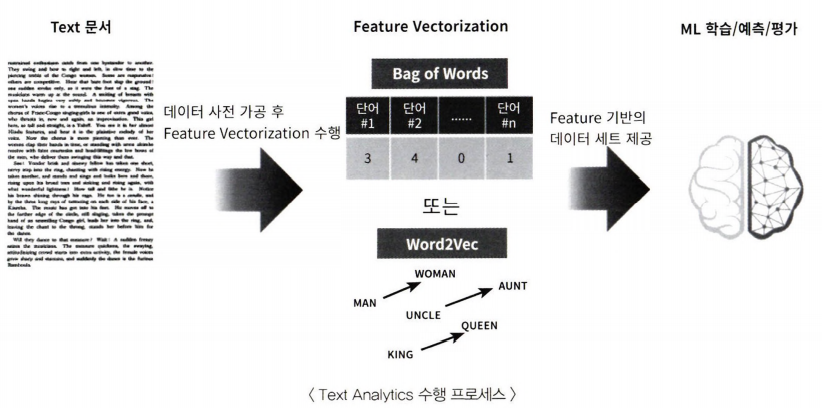

#### 파이썬 기반 NLP, 텍스트 분석 패키지

* NLTK : 가장 대표적이나 수행 속도 측면에서 아쉬워 실제로는 많이 쓰지 않음.
* Gensim : 토픽 모델링 분야
* SpaCy : 뛰어난 수행 성능으로 최근 가장 주목 받음

## 02. 텍스트 전처리 - 텍스트 정규화

#### 클렌징
텍스트 분석에 방해되는 문자를 제거

#### 텍스트 토큰화 - 문장 토큰화

In [1]:
from nltk import sent_tokenize

In [2]:
#마침표, 개행문자 등 데이터 셋 다운로드. 처음에만 다운로드하면 됨
import nltk
nltk.download('punkt') 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [5]:
text_sample = 'The Matrix is everywhere its all around us, here even in this room. \
You can see it out your window or on your television. \
You feel it when you go to work, or go to church or pay your taxes.'

sentences = sent_tokenize(text=text_sample)

In [6]:
print(type(sentences), len(sentences))
print(sentences)

<class 'list'> 3
['The Matrix is everywhere its all around us, here even in this room.', 'You can see it out your window or on your television.', 'You feel it when you go to work, or go to church or pay your taxes.']


NLTK 패키지의 sent_tokenize()에 의해 문장 단위로 토큰화되어 list 객체에 문자열을 저장

#### 텍스트 토큰화 - 단어 토큰화

In [7]:
from nltk import word_tokenize

sentence = "The Matrix is everywhere its all around us, here even in this room."
words = word_tokenize(sentence)
print(type(words), len(words))
print(words)

<class 'list'> 15
['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.']


NLTK 패키지의 word_tokenize()에 의해 단어 단위로 토큰화되어 list 객체에 문자열을 저장

이제 두 함수를 모두 사용하여 문장별로 단어 토큰화 해보자.

In [8]:
from nltk import word_tokenize, sent_tokenize

#문장별 단어 토큰화 함수
def tokenize_text(text):
    #문장 토큰화
    sentences = sent_tokenize(text)
    #분리된 문장별 단어 토큰화
    word_tokens = [word_tokenize(sentence) for sentence in sentences]
    return word_tokens

#수행해보기
word_tokens = tokenize_text(text_sample)
print(type(word_tokens), len(word_tokens))
print(word_tokens)

<class 'list'> 3
[['The', 'Matrix', 'is', 'everywhere', 'its', 'all', 'around', 'us', ',', 'here', 'even', 'in', 'this', 'room', '.'], ['You', 'can', 'see', 'it', 'out', 'your', 'window', 'or', 'on', 'your', 'television', '.'], ['You', 'feel', 'it', 'when', 'you', 'go', 'to', 'work', ',', 'or', 'go', 'to', 'church', 'or', 'pay', 'your', 'taxes', '.']]


#### n-gram
문장을 단어별로 토큰화할 경우 문맥의 의미가 무시된다. 이를 보완하기 위해 n-gram이 도입되었다. n-gram은 연속된 n개의 단어를 하나의 토큰화 단위로 분리하는 것이다. \
2-gram 예: Agent Smith knocks the door --> (Agent, Smith), (Smith, knocks), (knocks, the), (the, door)

#### Stop word 제거

의미없는 단어를 제거하는 과정으로, NLTK에 다양한 언어의 스톱 워드가 저장되어 있다.

In [9]:
#nltk 패키지의 불용어 사전 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
print('영어 stop words 개수:', len(nltk.corpus.stopwords.words('english')))
print(nltk.corpus.stopwords.words('english')[:20])

영어 stop words 개수: 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']


한국어는 없음
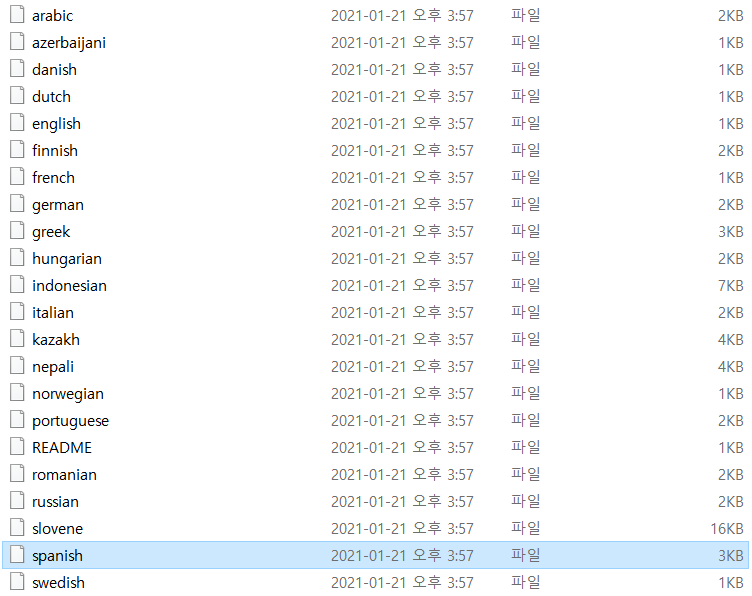

In [15]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
all_tokens = []
all_deleted_words = []

#문장별 토큰화된 단어 목록에서 스톱 워드를 제거하는 반복문
for sentence in word_tokens:
    filtered_words = []
    deleted_words = []
    #개별 문장별 제거
    for word in sentence:
        #소문자로 먼저 변환
        if word not in stopwords:
            filtered_words.append(word)
        else:
            deleted_words.append(word)
    all_tokens.append(filtered_words)
    all_deleted_words.append(deleted_words)
    
print(all_tokens) #스톱워드 제거 결과
print(all_deleted_words) #제거된 스톱워드들

[['The', 'Matrix', 'everywhere', 'around', 'us', ',', 'even', 'room', '.'], ['You', 'see', 'window', 'television', '.'], ['You', 'feel', 'go', 'work', ',', 'go', 'church', 'pay', 'taxes', '.']]
[['is', 'its', 'all', 'here', 'in', 'this'], ['can', 'it', 'out', 'your', 'or', 'on', 'your'], ['it', 'when', 'you', 'to', 'or', 'to', 'or', 'your']]


#### Stemming과 Lemmatization

Stemming과 Lemmatization은 문법적 또는 의미적으로 변화하는 단어의 원형을 찾는 것이다. 두 기능은 유사하지만, Stemming은 일부 철자가 훼손된 단어를 추출하는 경향이 있다. 반면, Lemmatization은 문법 + 의미적 부분을 감안해 더 정교하고, 오랜 시간을 필요로 한다.\
NLTK는 Porter, Lancaster, Snowball Stemmer 등 다양한 Stemmer와 WordNetLemmatizer라는 Lemmatizatizer를 제공한다.

Stemmer와 Lemmatizier를 비교해보자

In [17]:
from nltk.stem import LancasterStemmer
stemmer = LancasterStemmer()

print(stemmer.stem('working'), stemmer.stem('works'), stemmer.stem('worked'))
print(stemmer.stem('amusing'), stemmer.stem('amuses'), stemmer.stem('amused'))
print(stemmer.stem('happier'), stemmer.stem('happiest'))
print(stemmer.stem('fancier'), stemmer.stem('fanciest'))

work work work
amus amus amus
happy happiest
fant fanciest


Stemmer : 진행형, 3인칭 단수, 과거형 모두 ing, s, ed를 인식하여 원형으로 잘 변환한다. 반면 amuse는 단순히 해당 글자들을 삭제함으로써 원형인 amuse 대신 amus로 반환한다. 형용사도 마찬가지로 비교급, 최상급의 원형을 잘 찾지 못한다.

Lemmatization은 정확한 원형 단어 추출을 위해 품사를 입력해줘야 한다.

In [18]:
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')

lemma = WordNetLemmatizer()
print(lemma.lemmatize('amusing', 'v'), lemma.lemmatize('amuses', 'v'), lemma.lemmatize('amused', 'v'))
print(lemma.lemmatize('happier', 'a'), lemma.lemmatize('happiest', 'a'))
print(lemma.lemmatize('fancier', 'a'), lemma.lemmatize('fanciest', 'a'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


amuse amuse amuse
happy happy
fancy fancy


In [19]:
print(lemma.lemmatize('amusing'), lemma.lemmatize('amuses'), lemma.lemmatize('amused'))

amusing amuses amused


품사를 입력해주지 않으면 변화가 없다.

## Bag of Words - BOW

문서가 가진 모든 단어를 문맥이나 순서에 상관없이 봉투에 넣고 흔들어 섞는다는 의미로 Bag of Words(BOW) 모델이라 한다.

예시 - 카운트 기반 BOW
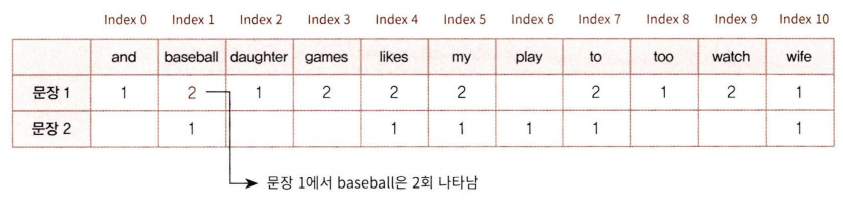

단점 : 문맥 의미 반영 부족, 희소 행렬 문제

#### BOW 피처 벡터화

M개의 문서가 있고, 모든 단어 갯수가 N개일 때, M*N개의 단어 피처로 이루어진 행렬을 구성하게 된다. 각 행렬 원소에는 카운트 또는 Tf-Idf의 값으로 채워진다.

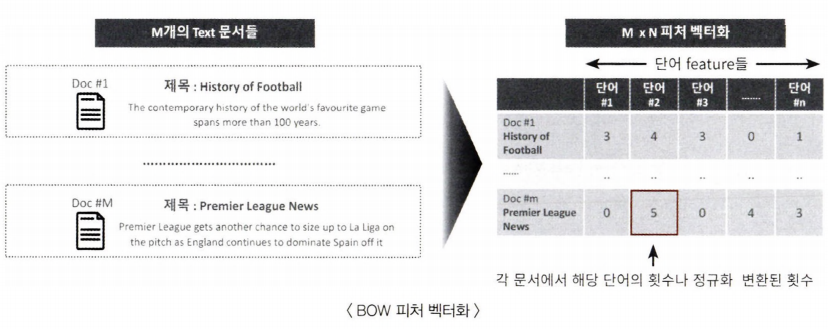

* 카운트 기반 : 빈도수 자체
* Tf-Idf 기반 : 개별 문서에서 자주 나타나면 높은 가중치를 주지만, 모든 문서에서 전반적으로 자주 나타나면 패널티를 준다
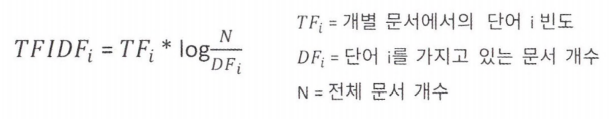

#### 사이킷런으로 Count 및 Tf-idf 벡터화 구현 : CountVectorizer, TfidfVectorizer

소문자 변환 - 토큰화(n_gram_range 반영하여 단어 기준) - 텍스트 정규화(stemmer, lemmatize는 지원하지 않아 stop words 제거만 수행) - 피처 벡터화(max_df, min_df, max_features 등 파라미터 반영)

#### 희소행렬을 처리 형식

희소 행렬 변환을 위해 사이파이를 주로 사용한다.
* COO 형식 : 0이 아닌 데이터만 별도의 Array에 저장, 그 데이터의 행과 열의 위치를 별도의 배열로 저장

In [22]:
import numpy as np

dense = np.array([[3,0,1], [0,2,0]]) #만들고자 하는 행렬

from scipy import sparse

#0이 아닌 데이터 추출
data = np.array([3,1,2])
#행과 열의 위치를 배열로 생성 - 3의 위치는 (0,0), 1의 위치는 (0,2), 2의 위치는 (1,1)
row_pos = np.array([0,0,1])
col_pos = np.array([0,2,1])
#sparse 패키지의 coo_matrix를 이용해 COO 형식으로 희소 행렬 생성
sparse_coo = sparse.coo_matrix((data, (row_pos, col_pos)))
sparse_coo

<2x3 sparse matrix of type '<class 'numpy.int32'>'
	with 3 stored elements in COOrdinate format>

COO 형식의 희소 행렬 객체 변수 sparse_coo를 toarray()를 이용해 행렬로 출력하자

In [23]:
sparse_coo.toarray()

array([[3, 0, 1],
       [0, 2, 0]])

* CSR 형식 : COO 형식에서의 행, 열 위치의 위치 배열을 이용
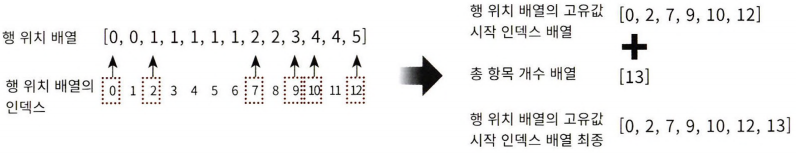

In [28]:
from scipy import sparse

dense2 = np.array([[0, 0, 1, 0, 0, 5],
[1, 4, 0, 3, 2, 5],
[0, 6, 0, 3, 0, 0],
[2, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 8],
[1, 0, 0, 0, 0, 0]])

# 0이 아닌 데이터 추출
data2 = np.array([1, 5, 1, 4, 3, 2, 5, 6, 3, 2, 7, 8, 1])
# 행 위치와 열 위치를 각각 array로 생성
row_pos = np.array([0, 0, 1, 1, 1, 1, 1, 2, 2, 3, 4, 4, 5])
col_pos = np.array([2, 5, 0, 1, 3, 4, 5, 1, 3, 0, 3, 5, 0])
# COO 형식으로 변환
sparse_coo = sparse.coo_matrix((data2, (row_pos, col_pos)))

# 행 위치 배열의 고유한 값의 시작 위치 인덱스를 배열로 생성
row_pos_ind = np.array([0, 2, 7, 9, 10, 12, 13])
# CSR 형식으로 변환
sparse_csr = sparse.csr_matrix((data2, col_pos, row_pos_ind))

print('COO 변환')
print(sparse_coo.toarray())

print('\nCSR 변환')
print(sparse_csr.toarray())

COO 변환
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]

CSR 변환
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


실제로 사용하는 방법 : coo_matrix, csr_matrix, toarray 메소드 이용

In [33]:
dense3 = np.array([[0, 0, 1, 0, 0, 5],
[1, 4, 0, 3, 2, 5],
[0, 6, 0, 3, 0, 0],
[2, 0, 0, 0, 0, 0],
[0, 0, 0, 7, 0, 8],
[1, 0, 0, 0, 0, 0]])
coo = sparse.coo_matrix(dense3)
csr = sparse.csr_matrix(dense3)
print("coo형식\n", coo)
print(coo.toarray())
print("csr형식\n", csr)
print(csr.toarray())

coo형식
   (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]
csr형식
   (0, 2)	1
  (0, 5)	5
  (1, 0)	1
  (1, 1)	4
  (1, 3)	3
  (1, 4)	2
  (1, 5)	5
  (2, 1)	6
  (2, 3)	3
  (3, 0)	2
  (4, 3)	7
  (4, 5)	8
  (5, 0)	1
[[0 0 1 0 0 5]
 [1 4 0 3 2 5]
 [0 6 0 3 0 0]
 [2 0 0 0 0 0]
 [0 0 0 7 0 8]
 [1 0 0 0 0 0]]


## 04. 텍스트 분류 실습 - 20 뉴스그룹 분류

In [34]:
from sklearn.datasets import fetch_20newsgroups

#데이터셋 다운로드
news_data = fetch_20newsgroups(subset = 'all', random_state =156)
print(news_data.keys())

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


In [36]:
#fetch_20newsgroups( ) API가 로컬 컴퓨터에 저장하는 디렉터리와 파일명
news_data.filenames

array(['C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\104321',
       'C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.motorcycles\\103229',
       'C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-test\\sci.electronics\\54286',
       ...,
       'C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.autos\\102799',
       'C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-train\\comp.sys.ibm.pc.hardware\\60175',
       'C:\\Users\\JIHYE\\scikit_learn_data\\20news_home\\20news-bydate-train\\rec.sport.baseball\\104387'],
      dtype='<U95')

In [35]:
import pandas as pd

print('target 클래스의 값과 분포도 \n', pd.Series(news_data.target).value_counts().sort_index())
print('target 클래스의 이름들 \n', news_data.target_names)

target 클래스의 값과 분포도 
 0     799
1     973
2     985
3     982
4     963
5     988
6     975
7     990
8     996
9     994
10    999
11    991
12    984
13    990
14    987
15    997
16    910
17    940
18    775
19    628
dtype: int64
target 클래스의 이름들 
 ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [37]:
print(news_data.data[0])

From: egreen@east.sun.com (Ed Green - Pixel Cruncher)
Subject: Re: Observation re: helmets
Organization: Sun Microsystems, RTP, NC
Lines: 21
Distribution: world
Reply-To: egreen@east.sun.com
NNTP-Posting-Host: laser.east.sun.com

In article 211353@mavenry.altcit.eskimo.com, maven@mavenry.altcit.eskimo.com (Norman Hamer) writes:
> 
> The question for the day is re: passenger helmets, if you don't know for 
>certain who's gonna ride with you (like say you meet them at a .... church 
>meeting, yeah, that's the ticket)... What are some guidelines? Should I just 
>pick up another shoei in my size to have a backup helmet (XL), or should I 
>maybe get an inexpensive one of a smaller size to accomodate my likely 
>passenger? 

If your primary concern is protecting the passenger in the event of a
crash, have him or her fitted for a helmet that is their size.  If your
primary concern is complying with stupid helmet laws, carry a real big
spare (you can put a big or small head in a big helmet, bu

뉴스그룹 기사의 내용뿐 아니라 제목, 작성자, 소속, 이메일 등 다양한 정보를 가지고 있음. 내용 이외의 정보는 제거해야 내용 자체로 카테고리를 분류하는 훈련의 의미가 있을 것이다. (포함하면 작성자와 소속, 이메일 만으로도 너무 높은 성능을 보이고, 이는 순수 텍스트를 활용하지 않는다는 면에서 의미가 없기 때문이다.)

In [48]:
from sklearn.datasets import fetch_20newsgroups

#subset = 'train'을 이용해 학습용 데이터만 추출
#remove = ('headers','footers','quotes')로 내용만 추출
train_news = fetch_20newsgroups(subset='train', remove = ('headers','footers','quotes'), random_state = 156)
X_train = train_news.data
y_train = train_news.target

#subset = 'test'을 이용해 테스트용 데이터만 추출
#remove = ('headers','footers','quotes')로 내용만 추출
test_news = fetch_20newsgroups(subset='test', remove = ('headers','footers','quotes'), random_state = 156)
X_test = test_news.data
y_test = test_news.target

print('학습 데이터 크기 {0}, 테스트 데이터 크기 {1}'.format(len(train_news.data), len(test_news.data)))

학습 데이터 크기 11314, 테스트 데이터 크기 7532


In [49]:
X_train[0]

"\n\nWhat I did NOT get with my drive (CD300i) is the System Install CD you\nlisted as #1.  Any ideas about how I can get one?  I bought my IIvx 8/120\nfrom Direct Express in Chicago (no complaints at all -- good price & good\nservice).\n\nBTW, I've heard that the System Install CD can be used to boot the mac;\nhowever, my drive will NOT accept a CD caddy is the machine is off.  How can\nyou boot with it then?\n\n--Dave\n"

In [50]:
y_train[0]

4

피처 벡터화 및 모델링을 진행해보자.\
주의할 점은, 테스트 데이터에 적용할 때, 학습 데이터에서 fit()한 벡터라이저 객체를 이용해야 한다는 것이다. 그래야 벡터라이저 결과 피처 개수가 동일해 진다.

* 카운트 기반 벡터화로 모델링

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

# 카운트 벡터라이저로 피처 벡터화 변환 수행
cnt_vect = CountVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect = cnt_vect.transform(X_train)

# 학습 데이터로 fit된 벡터라이저를 이용해 테스트 데이터 피처 벡터화 수행
X_test_cnt_vect = cnt_vect.transform(X_test)

print('학습 데이터 벡터화 결과 shpae : ', X_train_cnt_vect.shape)
print('테스트 데이터 벡터화 결과 shpae : ', X_test_cnt_vect.shape)

학습 데이터 벡터화 결과 shpae :  (11314, 101631)
테스트 데이터 벡터화 결과 shpae :  (7532, 101631)


피처의 개수는 101631개로 동일한 것을 확인할 수 있다.

피처 벡터화된 데이터에 로지스틱 회귀를 적용해보자.

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#logisticRegression을 이용한 학습, 예측, 평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train_cnt_vect, y_train)
pred = lr_clf.predict(X_test_cnt_vect)
print('CountVectorized Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test, pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


CountVectorized Logistic Regression의 예측 정확도는 0.608


* Tf-idf 기반 벡터화로 모델링

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

#TfIdf 벡터라이저로 피처 벡터화 변환 수행
tfidf_vect = TfidfVectorizer()
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)

# 학습 데이터로 fit된 벡터라이저를 이용해 테스트 데이터 피처 벡터화 수행
X_test_tfidf_vect = tfidf_vect.transform(X_test)

print('학습 데이터 벡터화 결과 shpae : ', X_train_tfidf_vect.shape)
print('테스트 데이터 벡터화 결과 shpae : ', X_test_tfidf_vect.shape)

학습 데이터 벡터화 결과 shpae :  (11314, 101631)
테스트 데이터 벡터화 결과 shpae :  (7532, 101631)


In [56]:
lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.674


TF-IDF가 좀 더 높은 정확도를 보인다. 일반적으로 문서가 많으면 카운트보다 tfidf가 더 좋은 결과를 도출한다.

성능을 향상시키기 위해서는 최적의 ML알고리즘을 선택하는 것과 최상의 피처 전처리를 수행하는 것이 있다. 다음과 같이 파라미터를 좀 더 적용하여 진행해보자.\
스톱 워드 : 'None' -> 'English' \
ngram_range : (1,1) -> (1,2) \
max_df : 미설정 -> 300

In [57]:
tfidf_vect = TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), max_df = 300)
tfidf_vect.fit(X_train)
X_train_tfidf_vect = tfidf_vect.transform(X_train)
X_test_tfidf_vect = tfidf_vect.transform(X_test)

lr_clf = LogisticRegression()
lr_clf.fit(X_train_tfidf_vect, y_train)
pred = lr_clf.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

TF-IDF Logistic Regression의 예측 정확도는 0.692


성능이 약간 개선되었다.

이번에는 그리드 서치를 통해 모델의 하이퍼 파라미터 최적화를 수행해보자.

In [ ]:
from sklearn.model_selection import GridSearchCV

#최적의 C값 도출 튜닝 수행. cv는 3폴드로 설정
params = {'C':[0.01,0.1,1,5,10]}
grid_cv_lr = GridSearchCV(lr_clf, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv_lr.fit(X_train_tfidf_vect, y_train)
print('LogisticRegression best C parameter : ', grid_cv_lr.best_params_)

#최적 C값으로 학습된 모델 적용하여 예측 및 정확도 평가
pred = grid_cv_lr.predict(X_test_tfidf_vect)
print('TF-IDF Logistic Regression의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

아웃풋 캡쳐
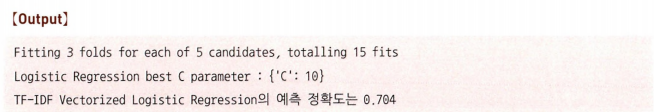

#### 사이킷런 파이프라인 사용 및 그리드서치와의 결합

파이프라인을 사용하면 데이터 전처리부터 모델링까지 통일된 API 기반에서 처리할 수 있어 더 직관적이다. 또한, 대용량의 피처 벡터화 결과를 따로 저장하지 않고 스트림 기반에서 바로 입력할 수 있어 수행 시간을 절약할 수 있다.

위에서 진행한 내용을 파이프라인으로 구현해보자.

In [ ]:
from sklearn.pipeline import Pipeline

#tfidf벡터라이저 객체와, 로지스틱회귀 객체를 파이프라인으로 연결하는 객체 pipeline
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1,2), max_df = 300)),
                    ('lr_clf', LogisticrRegression(C = 10))])

#벡터라이저를 위한 별도의 fit, transform 필요없음
#로지스틱회귀모델을 위한 별도의 fit, predict 필요없음
#파이프라인의 fit으로 벡터라이저와 모델링 피팅 한꺼번에 가능, predict로 한꺼번에 가능
pipeline.fit(X_train, y_train)
pred = pipeline.predict(X_test)
print('파이프라인을 통한 로지스틱 회귀의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

아웃풋 캡쳐
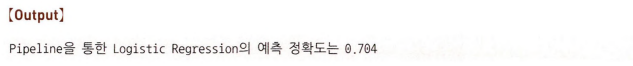

이번에는 그리드서치에 파이프라인을 입력하여 벡터라이저와 모델의 하이퍼 파라미터를 함께 최적화히해보자. 그리드서치에 입력할 피처 설정이 조금 바뀌니 주의하자.

이 예제는 파이프라인 + 그리드 서치로 27개의 파라미터 * 3번의 CV로 총 81번 학습하기 때문에 약 24분이 소모된다고 한다. 돌려보지는 않겠다.

In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('tfidf_vect', TfidfVectorizer(stop_words = 'english')),
    ('lr_clf', LogisticRegression())
])

# 파이프라인에 기술된 각 객체변수에 언더바 2개를 연달아 붙여 피처를 설정한다
# 3*3*3 총 27개의 파이프라인 경우의 수를 입력했다.
params = {'tfidf_vect__ngram_range': [(1,1), (1,2), (1,3)],
         'tfidf_vect__max_df': [100, 300, 700],
         'lr_clf__C': [1,5,10]
         }

# 그리드서치의 생성자에 Estimator가 아닌 파이프라인 객체 입력
grid_cv_pipe = GridSearchCV(pipeline, param_grid = params, cv = 3, scoring = 'accuracy', verbose = 1)
grid_cv_pipe.fit(X_train, y_train)
print(grid_cv_pipe.best_params_, grid_cv_pipe.best_score_)

pred = grid_cv_pipe.predict(X_test)
print('파이프라인을 통한 로지스틱 회귀의 예측 정확도는 {0:.3f}'.format(accuracy_score(y_test,pred)))

결과를 첨부하면 다음과 같다.
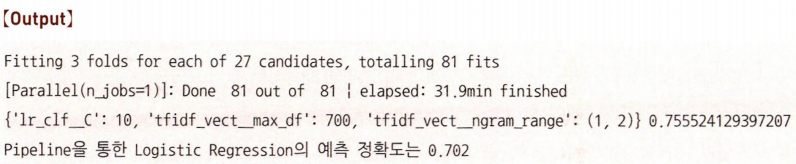

## 05. 감성 분석

* 지도 학습 : 학습 데이터와 타깃 레이블 값 기반으로 학습. 다른 종류의 분류와 거의 동일
* 비지도 학습 : 'Lexicon'이라는 일종의 감성 어휘 사전 이용

#### 지도학습 기반 감성 분석 실습 - IMDB 영화평

캐글의 IMDB 영화 사이트의 영화평 이용 \
https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [1]:
import pandas as pd

#탭 문자로 분리된 파일
#quoting = 3 옵션을 통해 큰따옴표 무시
review_df = pd.read_csv('data/word2vec-nlp-tutorial/labeledTrainData.tsv', header = 0, sep = '\t', quoting = 3)
review_df.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


sentiment : 1이면 긍정적 평가, 0이면 부정적 평가\
review : 영화평의 텍스트

In [2]:
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

< br > html 태그와 특수문자는 제거해주자.\
정규표현식을 이용하면 이러한 텍스트 처리를 쉽게 할 수 있다.

In [4]:
import re

# <br> 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />', ' ')

#정규표현식 모듈 re를 이용해 알파벳이 아닌 모든 문자를 공백으로 변환
#각 x에 대해 [^a-zA-Z] 즉, 알파벳이 아니면, " " 공백으로 바꿔라
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]"," ", x))

In [5]:
print(review_df['review'][0])

 With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay   Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him   The actual feature film bit when it finally starts is only on for  

In [6]:
#학습, 평가 데이터 분리
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size = 0.3, random_state = 156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [10]:
#모델링
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

#카운트 벡터라이저, 로지스틱 회귀를 파이프라인으로 수행
pipeline = Pipeline([('cnt_vect', CountVectorizer(stop_words = 'english', ngram_range = (1,2))),
                    ('lr_clf', LogisticRegression(C = 10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('에측 정확도는 {0:.4f}, Roc-Auc는 {1:.4f}'.format(accuracy_score(y_test, pred),roc_auc_score(y_test, pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


에측 정확도는 0.8860, Roc-Auc는 0.8859


In [11]:
pipeline.predict(X_test['review'])

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [12]:
pipeline.predict_proba(X_test['review'])

array([[9.99999776e-01, 2.24446720e-07],
       [9.62425178e-01, 3.75748218e-02],
       [9.85471048e-01, 1.45289518e-02],
       ...,
       [1.56097428e-01, 8.43902572e-01],
       [9.97565990e-01, 2.43400970e-03],
       [9.94172366e-01, 5.82763360e-03]])

In [13]:
#tfidf 벡터라이저로 다시 수행
pipeline = Pipeline([('tfidf_vect', TfidfVectorizer(stop_words = 'english', ngram_range = (1,2))),
                    ('lr_clf', LogisticRegression(C = 10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('에측 정확도는 {0:.4f}, Roc-Auc는 {1:.4f}'.format(accuracy_score(y_test, pred),roc_auc_score(y_test, pred)))

에측 정확도는 0.8936, Roc-Auc는 0.8934


#### 비지도 학습 기반 감성분석

감성 지수 : 단어의 긍정 감성 또는 부정 감성의 정도를 의미하는 수치로, 단어의 위치나 주변 단어, 문맥, POS(Part of Speech) 등을 참고해 결정된다.

* NLTK의 WordNet : 문맥에 따라 달라지는 의미를 고려할 수 있도록 Synset이라는 어휘의 시맨틱 정보를 제공한다. 아쉽게도 NLTK의 감성 사전의 예측 성능은 그리 좋지 못하다.
* SentiWordNet : NLTK의 워드넷과 유사. 긍정 지수, 부정 지수, 객관 지수 총 3가지의 감정 점수를 할당
* VADER : 주로 소셜 미디어의 텍스트에 대한 감성 분석 패키지. 비교적 빠른 시간과 뛰어난 감성 분석 결과로 대용량 데이터에 잘 사용됨.
* Pattern : 예측 성능 측면에서 가장 주목받음

#### SentiWordNet을 이용한 감성 분석

In [15]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to
[nltk_data]    |     C:\Users\J

[nltk_data]    |   Package semcor is already up-to-date!
[nltk_data]    | Downloading package senseval to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package senseval is already up-to-date!
[nltk_data]    | Downloading package sentiwordnet to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentiwordnet is already up-to-date!
[nltk_data]    | Downloading package sentence_polarity to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sentence_polarity is already up-to-date!
[nltk_data]    | Downloading package shakespeare to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package shakespeare is already up-to-date!
[nltk_data]    | Downloading package sinica_treebank to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Package sinica_treebank is already up-to-date!
[nltk_data]    | Downloading pac

[nltk_data]    |   Unzipping corpora\nonbreaking_prefixes.zip.
[nltk_data]    | Downloading package vader_lexicon to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    | Downloading package porter_test to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping stemmers\porter_test.zip.
[nltk_data]    | Downloading package wmt15_eval to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping models\wmt15_eval.zip.
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\JIHYE\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping misc\mwa_ppdb.zip.
[nltk_data]    | 
[nltk_data]  Done downloading collection all


True

In [16]:
from nltk.corpus import wordnet as wn

term = 'present'

#'present'라는 단어로 워드넷의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type : ', type(synsets))
print('synsets() 반환 값 개수 : ', len(synsets))
print('synsets() 반환 값 : ', synsets)

synsets() 반환 type :  <class 'list'>
synsets() 반환 값 개수 :  18
synsets() 반환 값 :  [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


총 18개의 시맨틱을 가지는 synset 객체가 반환되었다. 'present.n.01'이라는 POS 태그는 present 라는 의미, 명사 품사, 명사로써의 첫번째 의미를 뜻한다.

In [17]:
for synset in synsets:
    print('##### Synset name : ', synset.name(), '#####')
    print('POS : ', synset.lexname())
    print('Definition : ', synset.definition())
    print('Lemmas : ', synset.lemma_names())

##### Synset name :  present.n.01 #####
POS :  noun.time
Definition :  the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas :  ['present', 'nowadays']
##### Synset name :  present.n.02 #####
POS :  noun.possession
Definition :  something presented as a gift
Lemmas :  ['present']
##### Synset name :  present.n.03 #####
POS :  noun.communication
Definition :  a verb tense that expresses actions or states at the time of speaking
Lemmas :  ['present', 'present_tense']
##### Synset name :  show.v.01 #####
POS :  verb.perception
Definition :  give an exhibition of to an interested audience
Lemmas :  ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name :  present.v.02 #####
POS :  verb.communication
Definition :  bring forward and present to the mind
Lemmas :  ['present', 'represent', 'lay_out']
##### Synset name :  stage.v.01 #####
POS :  verb.creation
Definition :  perform (a play), especially on a stage
Lemmas :  

present.n.01을 보면, noun.time으로, 시간으로서의 명사적 의미, 즉 '현재'를 뜻한다.\
present.n.02는, noun.possession으로, '선물'을 뜻한다.

다른 어휘와의 관계를 유사도로 나타내는 path_similarity() 메소드

In [20]:
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

#단어별 synset을 반복하면서 다른 단어의 synset과 유사도 측정
for entity in entities:
    similarity = [round(entity.path_similarity(compared_entity), 2)
                 for compared_entity in entities]
    similarities.append(similarity)
    
#데이터프레임 형태로 저장
similarity_df = pd.DataFrame(similarities, columns = entity_names, index = entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


사자와 호랑이의 유사도가 0.33으로 가장 높고, 사자와 나무의 유사도가 0.07로 가장 낮다.

이번엔 wordnet 대신 sentiwordnet을 사용해보자.

In [21]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type : ', type(senti_synsets))
print('senti_synsets() 반환 값 개수 : ', len(senti_synsets))
print('senti_synsets() 반환 값 : ', senti_synsets)

senti_synsets() 반환 type :  <class 'list'>
senti_synsets() 반환 값 개수 :  11
senti_synsets() 반환 값 :  [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


어떤 단어가 감성적이지 않은 경우, 부정 지수와 긍정지수는 0, 객관성 지수를 1로 표현한다.

In [22]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수 : ', father.pos_score())
print('father 부정감성 지수 : ', father.neg_score())
print('father 객관성 지수 : ', father.obj_score())
print('\n')

fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수 : ', fabulous.pos_score())
print('fabulous 부정감성 지수 : ', fabulous.neg_score())
print('fabulous 객관성 지수 : ', fabulous.obj_score())

father 긍정감성 지수 :  0.0
father 부정감성 지수 :  0.0
father 객관성 지수 :  1.0


fabulous 긍정감성 지수 :  0.875
fabulous 부정감성 지수 :  0.125
fabulous 객관성 지수 :  0.0


#### Sentiwordnet을 이용한 영화 감상평 감성 분석 [비지도 학습]

1. 문서를 문장 단위로 분해
2. 문장을 다시 단어 단위로 토큰화, 품사 태깅
3. 품사 태깅된 단어를 기반으로 synset, senti_synset 객체 생성
4. 긍정/부정 지수를 구해 합산하여 특정 임계치를 기준으로 긍정/부정 판단

In [27]:
from nltk.corpus import wordnet as wn

# 간단한 NTLK PennTreebank Tag를 기반으로 WordNet기반의 품사 Tag로 변환
def penn_to_wn(tag):
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return

from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

##한 문서의 감성을 계산하는 함수
def swn_polarity(text):
    #감성지수 초기화
    sentiment = 0.0
    tokens_count = 0
    
    lemmatizer = WordNetLemmatizer()
    
    #문서를 문장 단위로 분해
    raw_sentences = sent_tokenize(text)
    
    ##문장별 프로세스
    #문장별 단어 토큰화 및 품사 태깅 후 sentisynset 생성, 감성 지수 합산
    for raw_sentence in raw_sentences:
        
        #NLTK 기반 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        
        ##토큰화된 단어별 프로세스
        for word, tag in tagged_sentence:
            #워드넷 기반 품사 태깅
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
            #어근 추출
            lemma = lemmatizer.lemmatize(word, pos = wn_tag)
            if not lemma:
                continue
                
            #추출한 어근과 품사를 입력해 synset 객체 생성
            synsets = wn.synsets(lemma, pos = wn_tag)
            if not synsets:
                continue
            #sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            #모든 단어에 대해 긍정 감성 지수는 +, 부정 감성 지수는 -로 합산
            sentiment += (swn_synset.pos_score() - swn_synset.neg_score())
            tokens_count += 1
                
    if not tokens_count:
        return 0
        
    #총 score가 0 이상인 경우 긍정(1), 아닌 경우 부정(0)
    if sentiment >= 0:
        return 1
    return 0

In [28]:
train_df = review_df #앞에서 생성한 데이터셋 review_df 이용
train_df['preds'] = train_df['review'].apply(lambda x: swn_polarity(x))
y_target = train_df['sentiment'].values
preds = train_df['preds'].values

In [29]:
#성능
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print("정확도:", np.round(accuracy_score(y_target, preds), 4))
print("정밀도:", np.round(precision_score(y_target, preds), 4))
print("재현율:", np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


#### VADER을 이용한 감성분석

SentimentIntensityAnalyzer의 polarity_scores() 메소드를 이용하면 각 문서의 감성 점수를 구할 수 있다.

In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(train_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


In [31]:
def vader_polarity(review, threshold = 0.1):
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    
    #compound 값이 threshold 입력값보다 크면 1, 작으면 0
    agg_score = scores['compound']
    final_sentiment = 1 if agg_score >= threshold else 0
    return final_sentiment

#문서별로 위의 함수를 수행하여 예측
review_df['vader_preds'] = review_df['review'].apply(lambda x: vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도 : ', np.round(accuracy_score(y_target, vader_preds), 4))
print("정밀도:", np.round(precision_score(y_target, vader_preds), 4))
print("재현율:", np.round(recall_score(y_target, vader_preds), 4))

[[ 6736  5764]
 [ 1867 10633]]
정확도 :  0.6948
정밀도: 0.6485
재현율: 0.8506


## 06. 토픽모델링 - 20 뉴스그룹

토픽모델링을 통해, 숨겨진 주제를 효과적으로 표현할 수 있는 중심 단어들을 함축적으로 추출해낼 수 있다. 대표적으로 LSA, LDA가 자주 사용된다.

LDA를 이용해 실습을 진행해보자.

In [33]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 모토사이클, 야구, 그래픽스, 윈도우즈, 중동, 기독교, 전자공학, 의학 8개 주제를 추출
cats = ['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics','comp.windows.x',
       'talk.politics.mideast', 'soc.religion.christian','sci.electronics','sci.med']

#위 카테고리에 해당하는 애들만 추출
news_df = fetch_20newsgroups(subset = 'all', remove = ('headers', 'footers', 'quotes'),
                            categories = cats, random_state = 0)

#LDA는 카운트 기반 벡터화만 적용함
count_vect = CountVectorizer(max_df = 0.95, max_features = 1000, min_df = 2,
                            stop_words = 'english', ngram_range = (1,2))
feat_vect = count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape : ', feat_vect.shape)

CountVectorizer Shape :  (7862, 1000)


In [39]:
news_df.data

['I appreciate if anyone can point out some good books about the dead sea\nscrolls of Qumran. Thanks in advance.',
 'hi all, i got several emails and a couple news replies and i guess i\nshoulda went into more detail... Being my anxiety level is peaking and you\nfolks have no clue who I am I may as well post the specifics and see what\nyou people think regarding my previous post.\nTo recap i applied to 20 schools total, 16 of which were MD and 4 DO.\n\nas it stands now i have had 13 rejects, 4 interviews( 2 MD and 2 DO), the\nresults of which are 2 waiting lists (1 MD and one DO)\n\n3 schools i heard nothing from at all.\n\nI have contacted all institutions other than the rejects and they have no\ninfo whatsoever to tell me.\n\nI have taken a good mix to apply to.. 2-3 top schools a bunch of middles\nand a few "safety"  (funny that most of my safety schools were the first\nto reject me)\n\nmy index is at like a 3.5 mcats were R7 P9 B10 WQ and R7 P9 B11 WR\nI couldnt get the damn readin

In [41]:
print(feat_vect)

  (0, 93)	1
  (0, 669)	1
  (0, 390)	1
  (0, 148)	1
  (0, 251)	1
  (0, 876)	1
  (0, 70)	1
  (0, 877)	1
  (1, 390)	1
  (1, 428)	1
  (1, 391)	1
  (1, 237)	1
  (1, 607)	1
  (1, 403)	1
  (1, 955)	2
  (1, 512)	2
  (1, 678)	2
  (1, 655)	2
  (1, 881)	2
  (1, 733)	1
  (1, 688)	1
  (1, 23)	1
  (1, 894)	1
  (1, 15)	1
  (1, 12)	1
  :	:
  (7858, 61)	3
  (7858, 864)	2
  (7858, 133)	1
  (7859, 511)	1
  (7859, 528)	1
  (7859, 782)	1
  (7859, 773)	1
  (7859, 54)	1
  (7859, 666)	1
  (7859, 159)	1
  (7859, 387)	1
  (7859, 126)	1
  (7860, 876)	1
  (7860, 70)	1
  (7860, 877)	1
  (7860, 428)	1
  (7860, 678)	1
  (7860, 922)	1
  (7860, 243)	1
  (7860, 795)	1
  (7860, 911)	1
  (7860, 682)	1
  (7860, 909)	1
  (7860, 490)	1
  (7861, 973)	1


In [34]:
#lda 토픽 모델링 수행, 주제는 8개
lda = LatentDirichletAllocation(n_components = 8, random_state = 0)
lda.fit(feat_vect)
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[3.60992018e+01, 1.35626798e+02, 2.15751867e+01, ...,
        3.02911688e+01, 8.66830093e+01, 6.79285199e+01],
       [1.25199920e-01, 1.44401815e+01, 1.25045596e-01, ...,
        1.81506995e+02, 1.25097844e-01, 9.39593286e+01],
       [3.34762663e+02, 1.25176265e-01, 1.46743299e+02, ...,
        1.25105772e-01, 3.63689741e+01, 1.25025218e-01],
       ...,
       [3.60204965e+01, 2.08640688e+01, 4.29606813e+00, ...,
        1.45056650e+01, 8.33854413e+00, 1.55690009e+01],
       [1.25128711e-01, 1.25247756e-01, 1.25005143e-01, ...,
        9.17278769e+01, 1.25177668e-01, 3.74575887e+01],
       [5.49258690e+01, 4.47009532e+00, 9.88524814e+00, ...,
        4.87048440e+01, 1.25034678e-01, 1.25074632e-01]])

components_ 속성은 개별 토픽별로 각 워드 피처가 얼마나 많이 그 토픽에 할당되었는지 수치값을 알려준다. 값이 클수록 그 토픽의 중심 단어가 된다.

직관적으로 살펴보기 위해, 각 토픽별로 연관도가 높은 순으로 단어를 나열하는 display_topics() 함수를 만들어보자.

In [45]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)
        
        #components_array에서 큰 순으로 정렬
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes = topic_word_indexes[:no_top_words]
        
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)
        
# CountVectorizer객체 내의 전체 word의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vect.get_feature_names()

#토픽별 연관도 높은 단어를 상위 15개 추출
display_topics(lda, feature_names, 15)

Topic # 0
year 10 game medical health team 12 20 disease cancer 1993 games years patients good
Topic # 1
don just like know people said think time ve didn right going say ll way
Topic # 2
image file jpeg program gif images output format files color entry 00 use bit 03
Topic # 3
like know don think use does just good time book read information people used post
Topic # 4
armenian israel armenians jews turkish people israeli jewish government war dos dos turkey arab armenia 000
Topic # 5
edu com available graphics ftp data pub motif mail widget software mit information version sun
Topic # 6
god people jesus church believe christ does christian say think christians bible faith sin life
Topic # 7
use dos thanks windows using window does display help like problem server need know run
